# Student Loan Risk Assesor 

## Business Understanding 

### Project Overview
In order to identify and distinguish between students who are good loan risks and those who are bad loan risks for the purpose of assessing the creditworthiness of these applicants, a predictive model must be developed to determine the characteristics of both types of students, based on their given individual situations and histories at the time that they applied for the loan. Here, the target variable of 'NoPaymentDue' records whether the given student was behind on their payments after one calendar year that they were supposed to start paying down their loan.

### Business Objectives
* Develop a predictive model to identify and distinguish between students who are likely to be good loan risks and those who are likely to be bad loan risks
* Reduce default rates, minimze financial losses of loaning out to students who are bad loan risks, and maximize finanical profits of loaning out to students who are good loan risks
* Improve overall decision-making in student loan approval processes

## Data Dictionary 


| Variable Name                 | Role               | Measurement |                |
|-------------------------------|--------------------|-------------|----------------|
| StudentID                     | ID                 | Interval    |                |
| NoPaymentDue                  | Target             | Binary      |                |
| Enlisted                      | Input              | Binary      |                |
| Service                       | Input              | Nominal     |                |
| Disabled                      | Input              | Binary      |                |
| Unemployed                    | Input              | Binary      |                |
| Enrolled                      | Input              | Binary      |                |
| School                        | Input              | Nominal     |                |
| Region                        | Input              | Nominal     |                |
| Country                       | Input              | Nominal     |                |
| Longest_Absence_From_School   | Input              | Interval    |                |
| Gender                        | Input              | Binary      |                |
| Marital_Status                | Input              | Binary      |                |
| Filed_for_Bankruptcy          | Input              | Binary      |                |
| LongTermPlanningScore         | Input              | Interval    |                |
| DecisionStyle                 | Input              | Nominal     |                |
| PowerOrientedScore            | Input              | Interval    |                |
| CommunityOrientedScore        | Input              | Interval    |                |
| Family_Income                 | Input              | Interval    |                |
| Parents' Education Level      | Input              | Ordinal     |                |
| Credit Score_Raw              | Input              | Interval    |                |
| Credit Score_AgeAdj           | Input              | Interval    |                |
| Loan Amount                   | Input              | Interval    |                |
| HS_Math                       | Input              | Ordinal     |                |
| HS_Science                    | Input              | Ordinal     |                |
| HS_English                    | Input              | Ordinal     |                |


### Functions

In [1]:
# Create a metadata dataframe that contains information about the input dataframe
def metadata(df):
    import pandas as pd
    columns_list = list(df.columns.values)
    metadata = pd.DataFrame(columns_list, columns=['col_name'])

    # Data types
    metadata['data_type'] = [i for i in df.dtypes.astype(str)]

    # Missing values
    metadata['missing_values'] = [i for i in df.isnull().sum()]

    # Missing values percentage in two digits number
    metadata['missing_values_percentage'] = [round(i*100,2) for i in df.isnull().sum() / df.shape[0]]

    # Number of unique values
    metadata['unique_values'] = [i for i in df.nunique()]

    # Number of unique values percentage
    metadata['unique_values_percentage'] = [round(i*100,2) for i in df.nunique() / df.shape[0]]

    # Basic statistics for interval columns
    interval_columns = [col for col in columns_list if df[col].dtype != 'object']
    desc_interval = df[interval_columns].agg(['min', 'max', 'std']).transpose().reset_index().rename(columns={'index': 'col_name'})
    metadata = metadata.merge(desc_interval, on='col_name', how='left')

    return metadata


In [2]:
# This is a function for data exploration. It takes in a dataframe, a column name and an optional hue column name.
def data_exploration(df, column, hue=None):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np

    # Check if hue is valid
    hue_condition = hue and df[hue].nunique() < 10
    if hue and not hue_condition:
        return "Hue has more than 10 unique values."

    # Determine the column type and unique value count
    col_type = df[column].dtype
    unique_values = df[column].nunique()

    # Handling categorical data or numerical with less than 10 unique values
    if col_type == 'object' or col_type == 'category':
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(f"Counts and percentages of unique values in {column}:\n{count_pct}")

        # Plotting
        if hue_condition:
            sns.countplot(data=df, x=column, hue=hue)
        else:
            sns.countplot(data=df, x=column, hue=column)
        plt.title(f"Distribution of {column}")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Handling numerical data with 10 or more unique values
    elif unique_values > 10:
        # Statistical summary
        mean = df[column].mean()
        median = df[column].median()
        std_dev = df[column].std()
        mode = df[column].mode()[0]

        # Interquartile range for outlier detection
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        outlier_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
        extreme_outlier_range = (q1 - 3 * iqr, q3 + 3 * iqr)

        # Outliers calculation
        outliers = df[(df[column] < outlier_range[0]) | (df[column] > outlier_range[1])]
        extreme_outliers = df[(df[column] < extreme_outlier_range[0]) | (df[column] > extreme_outlier_range[1])]

        # Output statistical information
        print(f"Mean of {column}: {mean:.2f}")
        print(f"Median of {column}: {median:.2f}")
        print(f"Standard deviation of {column}: {std_dev:.2f}")
        print(f"Mode of {column}: {mode}")
        print(f"Number of outliers in {column}: {len(outliers)}")
        print(f"Number of extreme outliers in {column}: {len(extreme_outliers)}")
        plt.figure(figsize=(16, 6))
        # Box plot as the first subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        if hue_condition:
            sns.boxplot(data=df, x=column, hue=hue)
        else:
            sns.boxplot(data=df, x=column)
        plt.title(f"Box plot of {column}")
        plt.grid(True)

        # Histogram as the second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        bins_num = int(np.ceil(np.sqrt(df[column].nunique())))  # Sturges' formula
        if hue_condition:
            sns.histplot(data=df, x=column, bins=bins_num, kde=True, hue=hue)
        else:
            sns.histplot(data=df, x=column, bins=bins_num, kde=True)
        plt.title(f"Histogram of {column}")
        plt.grid(True)

        # Display the combined figure with both subplots
        plt.tight_layout()
        plt.show()
    elif unique_values <= 10:
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(f"Counts and percentages of unique values in {column}:\n{count_pct}")

        # Plotting
        if hue_condition:
            sns.countplot(data=df, x=column, hue=hue)
        else:
            sns.countplot(data=df, x=column, hue=column)
        plt.title(f"Distribution of {column}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
# Example of usage:
# data_exploration(your_dataframe, 'your_column_name', hue='your_hue_column')


## Create Dataset 

#### Import Libraries 

In [3]:
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Collect Initial Data 

In [4]:
# Define a function for reading prolog files
def read_pl_file(filename):
    with open(filename, 'r') as f:
        content = f.readlines()
    return content

In [5]:
import re

##### DF 1

In [6]:
# read the no_payment_due.pl and extract StudentID and NoPaymentDue
content1 = read_pl_file(filename='Data/no_payment_due.pl')

facts = []
for line in content1:
    match = re.match(r'no_payment_due\(student(\d+),(.+)\)\.', line.strip())
    if match:
        studentid, status = match.groups()
        facts.append([studentid, status])
        
df1 = pd.DataFrame(facts, columns=['StudentID', 'NoPaymentDue'])
display(df1.head(), df1.shape)

,StudentID,NoPaymentDue
0,1000,pos
1,999,pos
2,998,pos
3,996,pos
4,994,pos


(1000, 2)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   StudentID     1000 non-null   object
 1   NoPaymentDue  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [8]:
df1['NoPaymentDue'].value_counts()

NoPaymentDue
pos    643
neg    357
Name: count, dtype: int64

In [9]:
# change the datatype of StudentID to int
df1['StudentID'] = df1['StudentID'].astype(int)

##### DF 2

In [10]:
# Enlisted file for Enlisted and Service
content2 = read_pl_file(filename='Data/enlist.pl')

facts = []
for line in content2:
    match = re.match(r'enlist\(student(\d+),(.+)\)\.', line.strip())
    if match:
        studentid, service = match.groups()
        facts.append([studentid, service])

df2 = pd.DataFrame(facts, columns=['StudentID', 'Service'])
display(df2.head(), df2.shape)

,StudentID,Service
0,40,fire_department
1,51,fire_department
2,109,fire_department
3,139,fire_department
4,148,fire_department


(306, 2)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   StudentID  306 non-null    object
 1   Service    306 non-null    object
dtypes: object(2)
memory usage: 4.9+ KB


In [12]:
df2['Service'].value_counts()

Service
fire_department    114
navy                37
army                35
peace_corps         32
marines             31
foreign_legion      31
air_force           26
Name: count, dtype: int64

In [13]:
# change the datatype of StudentID to int
df2['StudentID'] = df2['StudentID'].astype(int)

##### DF 3

In [14]:
# read Disabled file for Disabled
content3 = read_pl_file(filename='Data/disabled.pl')

facts = []
for line in content3:
    match = re.match(r'disabled\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0], 'Disabled'])

df3 = pd.DataFrame(facts, columns=['StudentID', 'Disabled'])
display(df3.head(), df3.shape)

,StudentID,Disabled
0,992,Disabled
1,976,Disabled
2,963,Disabled
3,918,Disabled
4,913,Disabled


(95, 2)

In [15]:
df3['Disabled'].value_counts()

Disabled
Disabled    95
Name: count, dtype: int64

In [16]:
# change the datatype of StudentID to int
df3['StudentID'] = df3['StudentID'].astype(int)

##### DF 4

In [17]:
# read Unemployed file for Unemployed
content4 = read_pl_file(filename='Data/unemployed.pl')

facts = []
for line in content4:
    match = re.match(r'unemployed\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0], 'Unemployed'])

df4 = pd.DataFrame(facts, columns=['StudentID', 'Unemployed'])
display(df4.head(), df4.shape)

,StudentID,Unemployed
0,1000,Unemployed
1,996,Unemployed
2,993,Unemployed
3,948,Unemployed
4,946,Unemployed


(98, 2)

In [18]:
df4['Unemployed'].value_counts()

Unemployed
Unemployed    98
Name: count, dtype: int64

In [19]:
# change the datatype of StudentID to int
df4['StudentID'] = df4['StudentID'].astype(int)

##### DF 5

In [20]:
# read Enrolled file for Enrolled and School
content5 = read_pl_file(filename = 'Data/enrolled.pl')

facts = []
for line in content5:
    match = re.match(r'enrolled\(student(\d+),(.+),(.+)\)\.', line.strip())
    if match:
        studentid, school, units = match.groups()
        facts.append([studentid, school, units])

df5 = pd.DataFrame(facts, columns=['StudentID', 'School', 'Units'])
display(df5.head(), df5.shape)

,StudentID,School,Units
0,10,ucb,2
1,18,ucsd,4
2,20,ucsd,3
3,35,ucsd,4
4,44,ucsd,1


(1194, 3)

In [21]:
df5['School'].value_counts()

School
occ     247
ucla    236
uci     230
smc     226
ucsd    166
ucb      89
Name: count, dtype: int64

In [22]:
df5['Units'].value_counts()

Units
3     131
4     126
1     108
2     107
10    105
9      94
6      89
5      88
12     87
11     80
7      69
8      68
15     16
14     14
13     12
Name: count, dtype: int64

In [23]:
# change the data type of Units from object to int
df5['Units'] = df5['Units'].astype(int)

# change the datatype of StudentID to int
df5['StudentID'] = df5['StudentID'].astype(int)

##### DF 6

In [24]:
# read Region file for Country, Region, Marital_Status
# from Region,Martial Status.xlsx
df6 = pd.read_excel('Data/Region, Marital Status.xlsx')
df6.columns = ['StudentID', 'Country', 'Region', 'Marital_Status']
display(df6.head(), df6.shape)

,StudentID,Country,Region,Marital_Status
0,1,USA,2,1
1,2,USA,5,0
2,3,USA,2,1
3,4,USA,1,0
4,5,USA,3,0


(1000, 4)

In [25]:
# change the datatype of StudentID, Region, Marital_Status to int
df6['StudentID'] = df6['StudentID'].astype(int)
df6['Region'] = df6['Region'].astype(int)
df6['Marital_Status'] = df6['Marital_Status'].astype(int)

##### DF 7 

In [26]:
# read male.pl for Gender
content7 = read_pl_file(filename = 'Data/male.pl')

facts = []
for line in content7:
    match = re.match(r'male\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0],'Male'])

df7 = pd.DataFrame(facts,columns=['StudentID', 'Gender'])
display(df7.head(), df7.shape)
        

,StudentID,Gender
0,997,Male
1,994,Male
2,992,Male
3,987,Male
4,986,Male


(497, 2)

In [27]:
df7['Gender'].value_counts()

Gender
Male    497
Name: count, dtype: int64

In [28]:
# change the datatype of StudentID to int
df7['StudentID'] = df7['StudentID'].astype(int)

##### DF 8

In [30]:
# read longest_absense_from_school.pl for Longest_Absence_From_School
content8 = read_pl_file(filename = 'Data/longest_absense_from_school.pl')

facts = []
for line in content8:
    match = re.match(r'longest_absense_from_school\(student(\d+),(.+)\)\.', line.strip())
    if match:
        studentid, months = match.groups()
        facts.append([studentid, months])

df8 = pd.DataFrame(facts,columns=['StudentID', 'Longest_Absence_From_School'])
display(df8.head(), df8.shape)

,StudentID,Longest_Absence_From_School
0,1000,7
1,999,4
2,998,1
3,997,8
4,996,7


(1000, 2)

In [31]:
df8['Longest_Absence_From_School'].value_counts()

Longest_Absence_From_School
4    120
5    110
3    104
0    100
7     99
2     96
6     95
1     93
8     93
9     90
Name: count, dtype: int64

In [32]:
# change the datatype of StudentID to int
df8['StudentID'] = df8['StudentID'].astype(int)

##### DF 9

In [33]:
# read filed_for_bankrupcy.pl for Filed_For_Bankruptcy
content9 = read_pl_file(filename = 'Data/filed_for_bankrupcy.pl')

facts = []
for line in content9:
    match = re.match(r'filed_for_bankrupcy\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0], 'Filed_For_Bankruptcy'])

df9 = pd.DataFrame(facts,columns=['StudentID', 'Filed_For_Bankruptcy'])
display(df9.head(), df9.shape)

,StudentID,Filed_For_Bankruptcy
0,999,Filed_For_Bankruptcy
1,998,Filed_For_Bankruptcy
2,958,Filed_For_Bankruptcy
3,956,Filed_For_Bankruptcy
4,953,Filed_For_Bankruptcy


(96, 2)

In [34]:
df9['Filed_For_Bankruptcy'].value_counts()

Filed_For_Bankruptcy
Filed_For_Bankruptcy    96
Name: count, dtype: int64

In [35]:
# change the datatype of StudentID to int
df9['StudentID'] = df9['StudentID'].astype(int)

##### DF 10

In [37]:
# read Personality Characteristics file for LongTermPlanningScore, DecisionStyle, PowerOrientedScore, CommunityOrientedScore
df10 = pd.read_excel('Data/Personality Characteristics Data.xlsx')
df10.columns = ['StudentID', 'LongTermPlanningScore', 'DecisionStyle', 'PowerOrientedScore', 'CommunityOrientedScore']
display(df10.head(), df10.shape)

,StudentID,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore
0,1,0.956004,Emotional,0.767967,0.189491
1,2,0.601589,Analytical,1.000000,0.529815
2,3,0.655254,Emotional,0.589539,0.589539
3,4,0.841278,Emotional,0.805702,0.061538
4,5,0.738851,Emotional,0.415433,0.241257


(1000, 5)

In [38]:
for i in df10.columns:
    display(df10[i].value_counts())

StudentID
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64

LongTermPlanningScore
0.956004    1
0.798902    1
0.954288    1
0.792797    1
0.803643    1
           ..
0.907420    1
0.837065    1
0.715328    1
0.699305    1
0.843289    1
Name: count, Length: 1000, dtype: int64

DecisionStyle
Emotional     914
Analytical     86
Name: count, dtype: int64

PowerOrientedScore
1.000000    41
0.767967     1
0.582612     1
0.748088     1
0.958999     1
            ..
0.559756     1
0.718353     1
0.767816     1
0.572930     1
0.808111     1
Name: count, Length: 960, dtype: int64

CommunityOrientedScore
0.189491    1
0.545317    1
0.528228    1
0.697897    1
0.000108    1
           ..
0.124746    1
0.013886    1
0.572930    1
0.140975    1
0.569837    1
Name: count, Length: 1000, dtype: int64

In [39]:
# change the datatype of StudentID to int
df10['StudentID'] = df10['StudentID'].astype(int)

# change the datatype of LongTermPlanningScore, PowerOrientedScore, CommunityOrientedScore to float
df10['LongTermPlanningScore'] = df10['LongTermPlanningScore'].astype(float)
df10['PowerOrientedScore'] = df10['PowerOrientedScore'].astype(float)
df10['CommunityOrientedScore'] = df10['CommunityOrientedScore'].astype(float)

##### DF 11 

In [40]:
# read Family_Income file for Family_Income
df11 = pd.read_excel('Data/Family_Income.xlsx')
df11.columns = ['StudentID', 'Family_Income']
display(df11.head(), df11.shape)

,StudentID,Family_Income
0,1,109770.95
1,2,58442.99
2,3,97125.87
3,4,55256.40
4,5,58187.16


(1000, 2)

In [41]:
# change the datatype of StudentID to int
df11['StudentID'] = df11['StudentID'].astype(int)

# change the datatype of Family_Income to float
df11['Family_Income'] = df11['Family_Income'].astype(float)

##### DF 12 

In [42]:
# Parents_Education file for Parent_Education_Level
df12 = pd.read_excel('Data/Parents_Education.xlsx')
df12.columns = ['StudentID', 'Parent_Education_Level']
display(df12.head(), df12.shape)

,StudentID,Parent_Education_Level
0,1,Bachelor's
1,2,Doctorate
2,3,HS or Lower
3,4,Master's
4,5,Master's


(1000, 2)

In [43]:
df12['Parent_Education_Level'].value_counts()

Parent_Education_Level
Doctorate            304
Bachelor's           301
HS or Lower          284
Master's             107
VERY HS or Lower       2
 VERY HS or Lower      1
GREAT                  1
Name: count, dtype: int64

In [44]:
# change the datatype of StudentID to int
df12['StudentID'] = df12['StudentID'].astype(int)

##### DF 13

In [45]:
# read CreditRating Data 2012.xlsx for Credit_Score_Raw and Credit_Score_AgeAdj
df13 = pd.read_excel('Data/CreditRating Data 2012.xlsx')
df13.columns = ['StudentID', 'Credit_Score_Raw', 'Credit_Score_AgeAdj']
display(df13.head(), df13.shape)

,StudentID,Credit_Score_Raw,Credit_Score_AgeAdj
0,1,0.495227,0.767967
1,2,0.987649,0.529815
2,3,0.249315,0.589539
3,4,0.653183,0.805702
4,5,0.273099,0.415433


(1000, 3)

In [46]:
df13.describe()

,StudentID,Credit_Score_Raw,Credit_Score_AgeAdj
count,1000.000000,1000.000000,1000.000000
mean,500.500000,0.460375,0.550692
std,288.819436,0.235416,0.196417
min,1.000000,0.000735,0.045899
25%,250.750000,0.266841,0.415714
50%,500.500000,0.515425,0.562368
75%,750.250000,0.624391,0.706897
max,1000.000000,1.000000,0.985665


In [47]:
# change the datatype of StudentID to int
df13['StudentID'] = df13['StudentID'].astype(int)

# change the datatype of Credit_Score_Raw, Credit_Score_AgeAdj to float
df13['Credit_Score_Raw'] = df13['Credit_Score_Raw'].astype(float)

##### DF 14

In [48]:
# read LoanAmount.xlsx for Loan_Amount
df14 = pd.read_excel('Data/LoanAmount.xlsx')
df14.columns = ['StudentID', 'Loan_Amount']
display(df14.head(), df14.shape)

,StudentID,Loan_Amount
0,1,19861
1,2,17391
2,3,8118
3,4,18905
4,5,16175


(1000, 2)

In [49]:
# change the datatype of StudentID and Loan_Amount to int
df14['StudentID'] = df14['StudentID'].astype(int)
df14['Loan_Amount'] = df14['Loan_Amount'].astype(float)


##### DF 15

In [50]:
# read HS_Academics 2012.xlsx for HS_Math, HS_Science, HS_English
df15 = pd.read_excel('Data/HS_Academics 2012.xlsx')
df15.columns = ['StudentID', 'HS_Math', 'HS_Science', 'HS_English']
display(df15.head(), df15.shape)

,StudentID,HS_Math,HS_Science,HS_English
0,1,10,10,10.0
1,2,9,9,10.0
2,3,9,6,6.0
3,4,10,9,9.0
4,5,6,8,5.0


(1000, 4)

In [51]:
# change the datatype of StudentID to int
df15['StudentID'] = df15['StudentID'].astype(int)

# change the datatype of HS_Math, HS_Science, HS_English to float
df15['HS_Math'] = df15['HS_Math'].astype(float)
df15['HS_Science'] = df15['HS_Science'].astype(float)
df15['HS_English'] = df15['HS_English'].astype(float)


In [52]:
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15]

# Perform the cross join
cross_joined_df = dataframes[0]
for df in dataframes[1:]:
    cross_joined_df = cross_joined_df.merge(df, on='StudentID', how='outer')

In [53]:
cross_joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   StudentID                    1260 non-null   int32  
 1   NoPaymentDue                 1260 non-null   object 
 2   Service                      370 non-null    object 
 3   Disabled                     120 non-null    object 
 4   Unemployed                   130 non-null    object 
 5   School                       1218 non-null   object 
 6   Units                        1218 non-null   float64
 7   Country                      1260 non-null   object 
 8   Region                       1260 non-null   int32  
 9   Marital_Status               1260 non-null   int32  
 10  Gender                       624 non-null    object 
 11  Longest_Absence_From_School  1260 non-null   object 
 12  Filed_For_Bankruptcy         120 non-null    object 
 13  LongTermPlanningSc

In [54]:
cross_joined_df.to_csv('croos_joined.csv', index=False)

In [55]:
#START FROM HERE 
data = pd.read_csv("croos_joined.csv")

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   StudentID                    1260 non-null   int64  
 1   NoPaymentDue                 1260 non-null   object 
 2   Service                      370 non-null    object 
 3   Disabled                     120 non-null    object 
 4   Unemployed                   130 non-null    object 
 5   School                       1218 non-null   object 
 6   Units                        1218 non-null   float64
 7   Country                      1260 non-null   object 
 8   Region                       1260 non-null   int64  
 9   Marital_Status               1260 non-null   int64  
 10  Gender                       624 non-null    object 
 11  Longest_Absence_From_School  1260 non-null   int64  
 12  Filed_For_Bankruptcy         120 non-null    object 
 13  LongTermPlanningSc

In [57]:
metadata(data)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int64,0,0.00,1000,79.37,1.000000,1000.000000,291.320155
1,NoPaymentDue,object,0,0.00,2,0.16,NaN,NaN,NaN
2,Service,object,890,70.63,7,0.56,NaN,NaN,NaN
3,Disabled,object,1140,90.48,1,0.08,NaN,NaN,NaN
4,Unemployed,object,1130,89.68,1,0.08,NaN,NaN,NaN
5,School,object,42,3.33,6,0.48,NaN,NaN,NaN
6,Units,float64,42,3.33,15,1.19,1.000000,15.000000,3.753829
7,Country,object,0,0.00,2,0.16,NaN,NaN,NaN
8,Region,int64,0,0.00,5,0.40,1.000000,5.000000,1.411707
9,Marital_Status,int64,0,0.00,3,0.24,0.000000,2.000000,0.500274


In [58]:
data.shape

(1260, 25)

In [59]:
data.drop_duplicates(inplace=True)

In [60]:
data.shape

(1257, 25)

In [61]:
metadata(data)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int64,0,0.00,1000,79.55,1.000000,1000.000000,291.160520
1,NoPaymentDue,object,0,0.00,2,0.16,NaN,NaN,NaN
2,Service,object,890,70.80,7,0.56,NaN,NaN,NaN
3,Disabled,object,1137,90.45,1,0.08,NaN,NaN,NaN
4,Unemployed,object,1127,89.66,1,0.08,NaN,NaN,NaN
5,School,object,42,3.34,6,0.48,NaN,NaN,NaN
6,Units,float64,42,3.34,15,1.19,1.000000,15.000000,3.754306
7,Country,object,0,0.00,2,0.16,NaN,NaN,NaN
8,Region,int64,0,0.00,5,0.40,1.000000,5.000000,1.410898
9,Marital_Status,int64,0,0.00,3,0.24,0.000000,2.000000,0.500239


## Data Understanding 

### 1- 8 

### 9-16

#### Marital_Status

Counts and percentages of unique values in Marital_Status:
                Count  Percentage
Marital_Status                   
1                 676   53.778839
0                 580   46.141607
2                   1    0.079554


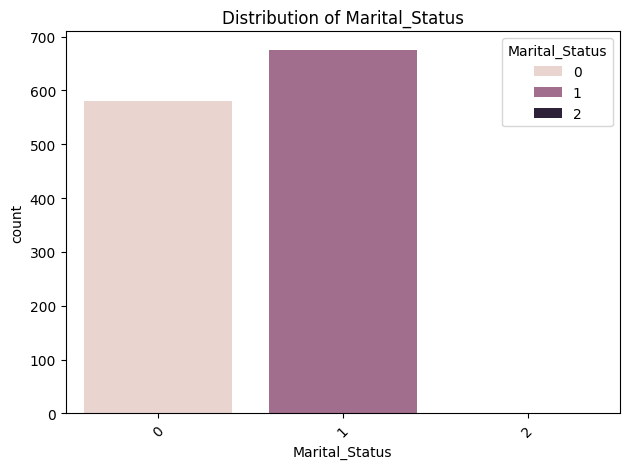

In [62]:
data_exploration(data, 'Marital_Status')

#### Gender

Counts and percentages of unique values in Gender:
        Count  Percentage
Gender                   
Male      623       100.0


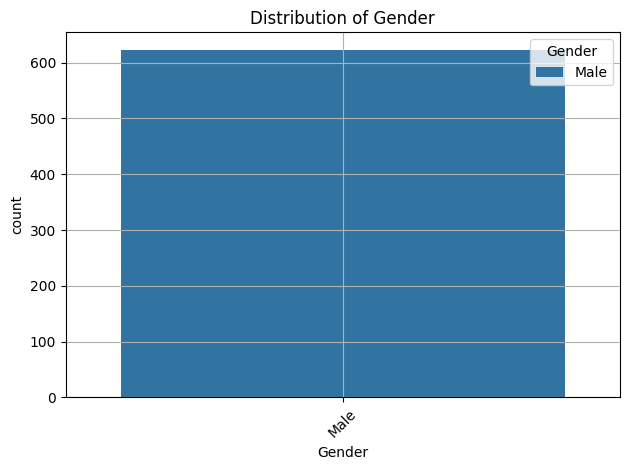

In [63]:
data_exploration(data, 'Gender')

#### Longest_Absence_From_School

Counts and percentages of unique values in Longest_Absence_From_School:
                             Count  Percentage
Longest_Absence_From_School                   
4                              153   12.171838
5                              139   11.058075
0                              133   10.580748
3                              129   10.262530
6                              125    9.944312
7                              122    9.705648
8                              117    9.307876
1                              116    9.228321
2                              116    9.228321
9                              107    8.512331


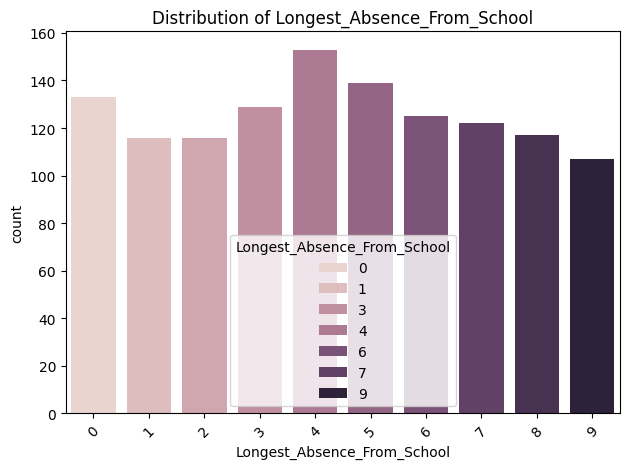

In [64]:
data_exploration(data, 'Longest_Absence_From_School')

#### Filed_For_Bankruptcy

Counts and percentages of unique values in Filed_For_Bankruptcy:
                      Count  Percentage
Filed_For_Bankruptcy                   
Filed_For_Bankruptcy    119       100.0


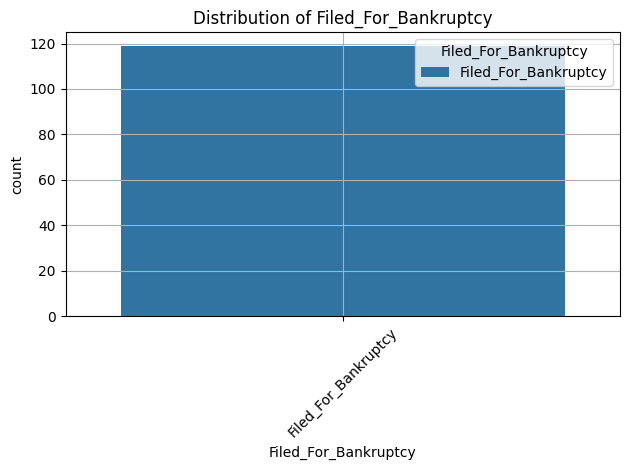

In [65]:
data_exploration(data, 'Filed_For_Bankruptcy')

#### LongTermPlanningScore

Mean of LongTermPlanningScore: 0.70
Median of LongTermPlanningScore: 0.72
Standard deviation of LongTermPlanningScore: 0.17
Mode of LongTermPlanningScore: 0.7791569479229138
Number of outliers in LongTermPlanningScore: 10
Number of extreme outliers in LongTermPlanningScore: 0


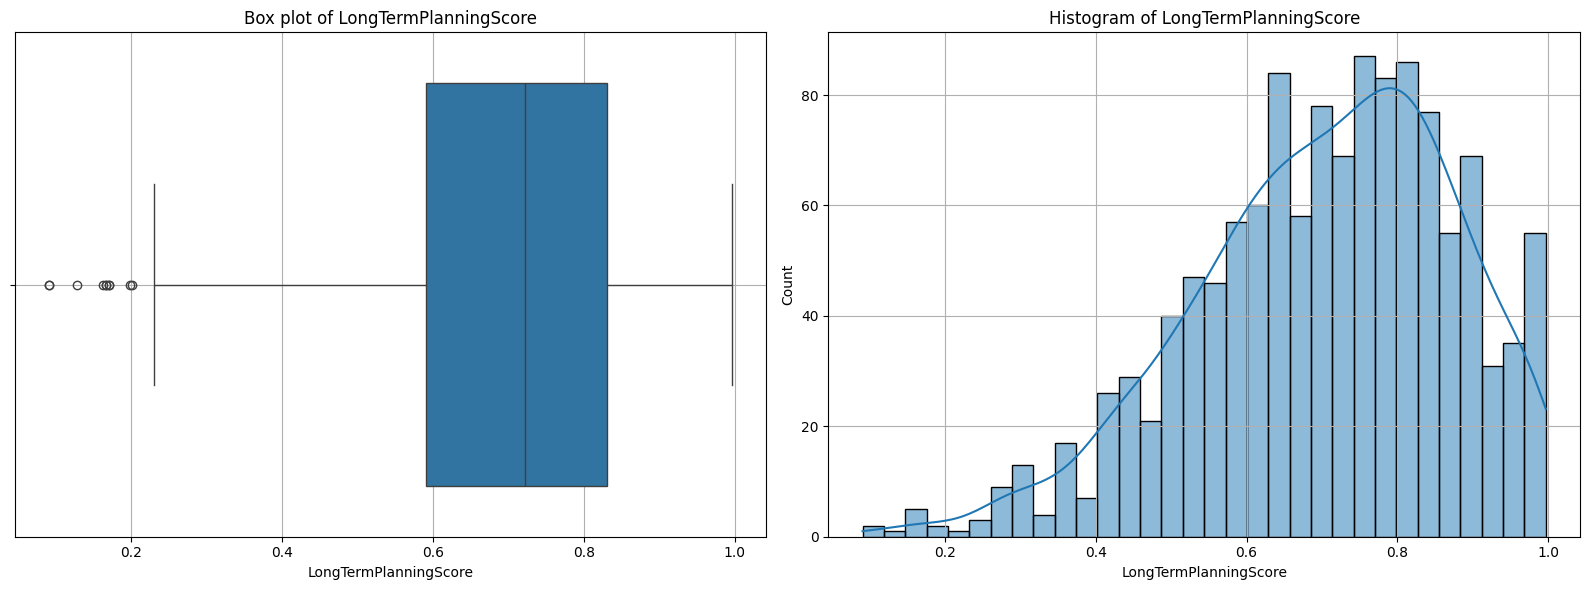

In [66]:
data_exploration(data, 'LongTermPlanningScore')

#### DecisionStyle

Counts and percentages of unique values in DecisionStyle:
               Count  Percentage
DecisionStyle                   
Emotional       1151   91.567224
Analytical       106    8.432776


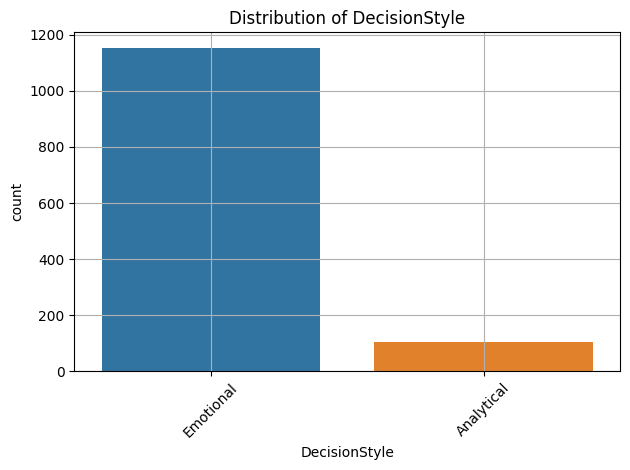

In [67]:
data_exploration(data, 'DecisionStyle')

#### PowerOrientedScore

Mean of PowerOrientedScore: 0.62
Median of PowerOrientedScore: 0.64
Standard deviation of PowerOrientedScore: 0.20
Mode of PowerOrientedScore: 1.0
Number of outliers in PowerOrientedScore: 7
Number of extreme outliers in PowerOrientedScore: 0


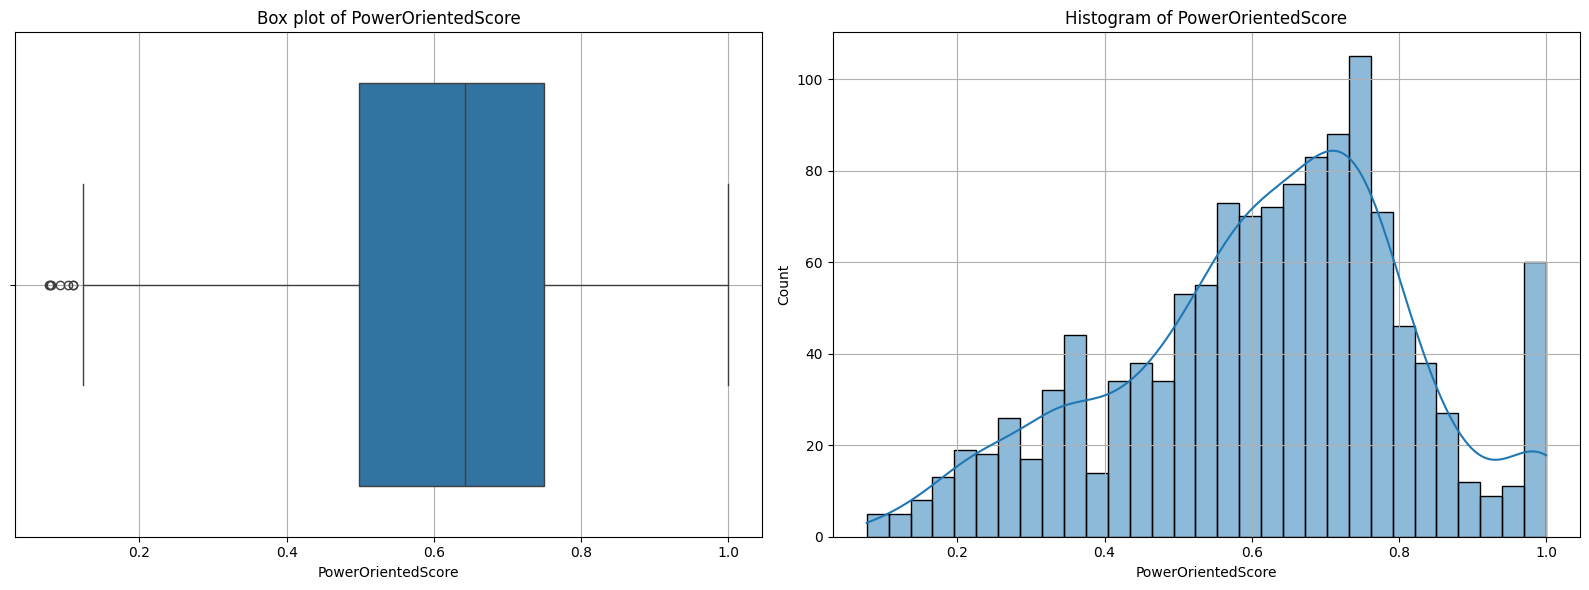

In [68]:
data_exploration(data, 'PowerOrientedScore')

#### CommunityOrientedScore

Mean of CommunityOrientedScore: 0.38
Median of CommunityOrientedScore: 0.37
Standard deviation of CommunityOrientedScore: 0.21
Mode of CommunityOrientedScore: 0.2288083838675447
Number of outliers in CommunityOrientedScore: 0
Number of extreme outliers in CommunityOrientedScore: 0


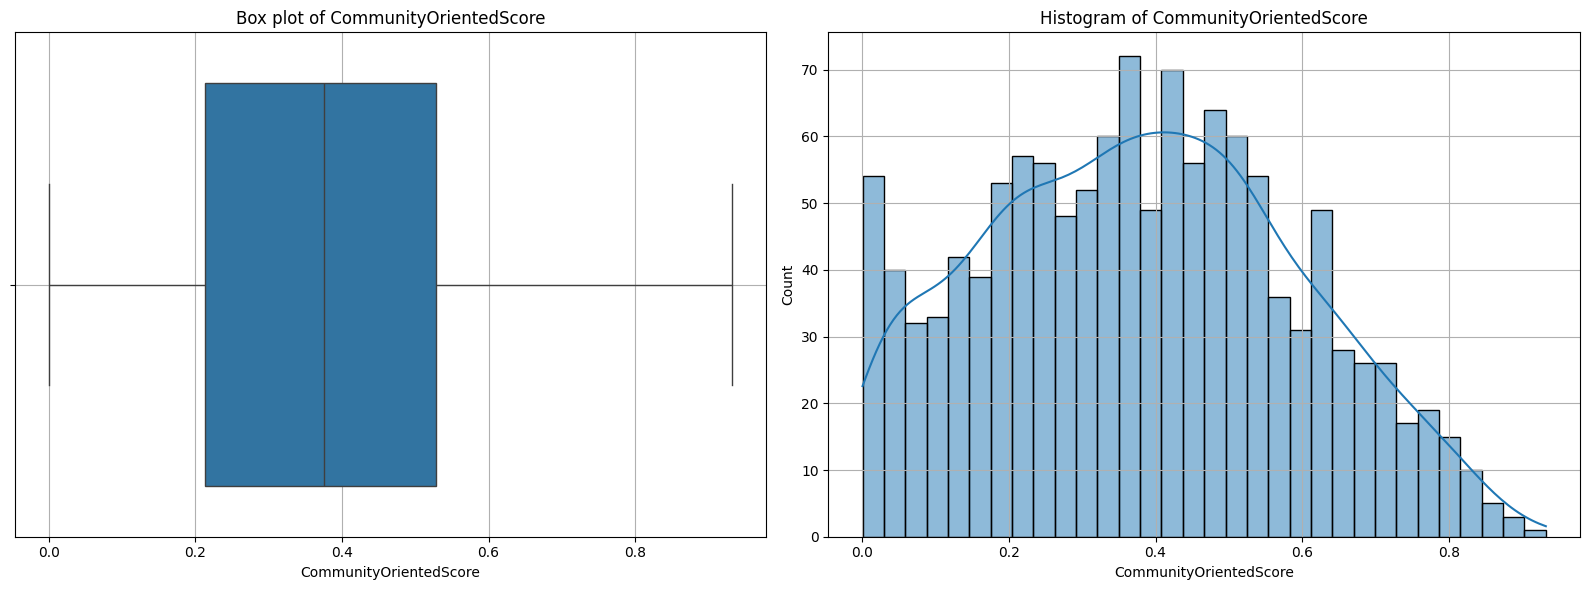

In [69]:
data_exploration(data, 'CommunityOrientedScore')

### 17-24